# Importing Packages

In [162]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


In [146]:
ames = pd.read_csv("C:/Users/petew/OneDrive/Desktop/Cal Poly/MSBA/GSB-544-(Python)/Week-7/AmesHousing.csv")
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.000,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.000,Unf,0.000,441.000,1080.000,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.000,0.000,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.000,Fin,2.000,528.000,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.000,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,1065.000,Unf,0.000,1045.000,2110.000,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.000,0.000,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.000,Fin,2.000,522.000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [147]:
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

ames = ames.dropna()

X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]
X.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.000,Unf,0.000,441.000,1080.000,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.000,0.000,1,0,3,1,TA,7,Typ,2,2.000,528.000,P,210,62,0,0,0,0,0,5,2010,WD,Normal
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,1.000,730.000,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,1.000,312.000,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,1065.000,Unf,0.000,1045.000,2110.000,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.000,0.000,2,1,3,1,Ex,8,Typ,2,2.000,522.000,Y,0,0,0,0,0,0,0,4,2010,WD,Normal
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,2.000,482.000,Y,212,34,0,0,0,0,0,3,2010,WD,Normal


# OLS Pipeline

In [148]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [149]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')


array([-3.45043737e+19, -3.45649953e+20, -7.07707112e+21, -7.02073548e+20, -1.28749391e+20])

In [150]:
lr_pipeline_1.fit(X, y)

feature_names = lr_pipeline_1.named_steps['preprocessing'].get_feature_names_out()
regression_coefficients = lr_pipeline_1.named_steps['linear_regression'].coef_
coefficients_df1 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient Lin': regression_coefficients
})

coefficients_df1.sort_values(by='Coefficient Lin', ascending=False).reset_index(drop=True).head()

,Feature,Coefficient Lin
0,dummify__Lot Shape_IR2,114166668648212048.000
1,dummify__Lot Shape_Reg,114166668648207808.000
2,dummify__Lot Shape_IR3,114166668648206960.000
3,dummify__Lot Shape_IR1,114166668648206704.000
4,dummify__Lot Config_CulDSac,52387702380047248.000


# Ridge Pipeline

In [151]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1.0))]
)

In [152]:
cross_val_score(ridge_pipeline, X, y, cv = 5, scoring = 'r2')


array([0.89815807, 0.91744024, 0.79493606, 0.78522563, 0.91389818])

In [153]:
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D053654500>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001D05CB900B0>)])),
                ('ridge_regression', Ridge())])

In [154]:
feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()
ridge_coefficients = ridge_pipeline.named_steps['ridge_regression'].coef_
coefficients_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient Rid': ridge_coefficients
})

coefficients_df2.sort_values(by='Coefficient Rid', ascending=False).reset_index(drop=True).head()

,Feature,Coefficient Rid
0,dummify__Roof Matl_WdShngl,83910.181
1,dummify__Neighborhood_GrnHill,66530.686
2,dummify__Condition 2_PosA,47180.798
3,dummify__Neighborhood_StoneBr,36999.674
4,dummify__Roof Matl_Membran,32582.553


# Comparing Ridge Regression to Standard Linear Regression

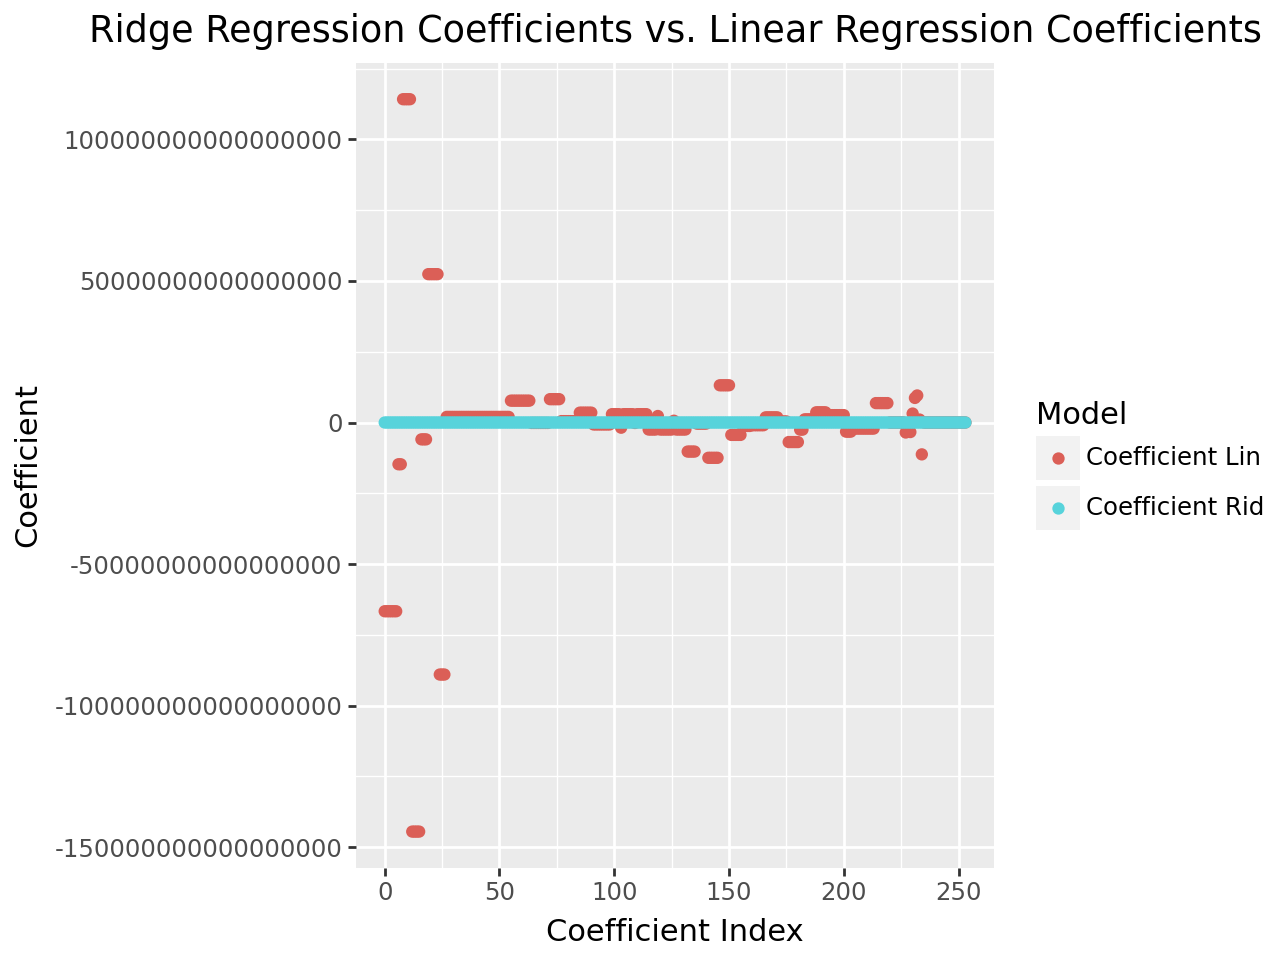

In [155]:
from plotnine import ggplot, aes, geom_col, geom_histogram, geom_point, facet_wrap, theme, element_text, labs

plot_df = pd.merge(coefficients_df1, coefficients_df2, left_on= "Feature", right_on= "Feature")
plot_df = plot_df.reset_index()

plot_df = pd.melt(plot_df, id_vars = ["index", "Feature"], value_vars= ["Coefficient Lin", "Coefficient Rid"], var_name = "Model", value_name = "Coefficient")
plot_df
# (ggplot(plot_df, aes(x = "Feature", y = "Coefficient", fill = "Model"))+
#     geom_col(position = "dodge")
#     )

(ggplot(plot_df, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Ridge Regression Coefficients vs. Linear Regression Coefficients",
         x = "Coefficient Index",
         y = "Coefficient"))

The coefficients from the Ridge Regression are significantly less in magnitude than the linear regression coefficients. This is due to the additional sum of squared coefficients in the loss function. When the loss function is minimized to fit the regression, it prioritizes minimizing sum of squared residuals in addition to minimizing sum of squared coefficients. This addition to the loss function reduces overfitting from explanatory variables by minimizing coefficient values.

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 173'. Pick better value with 'binwidth'.


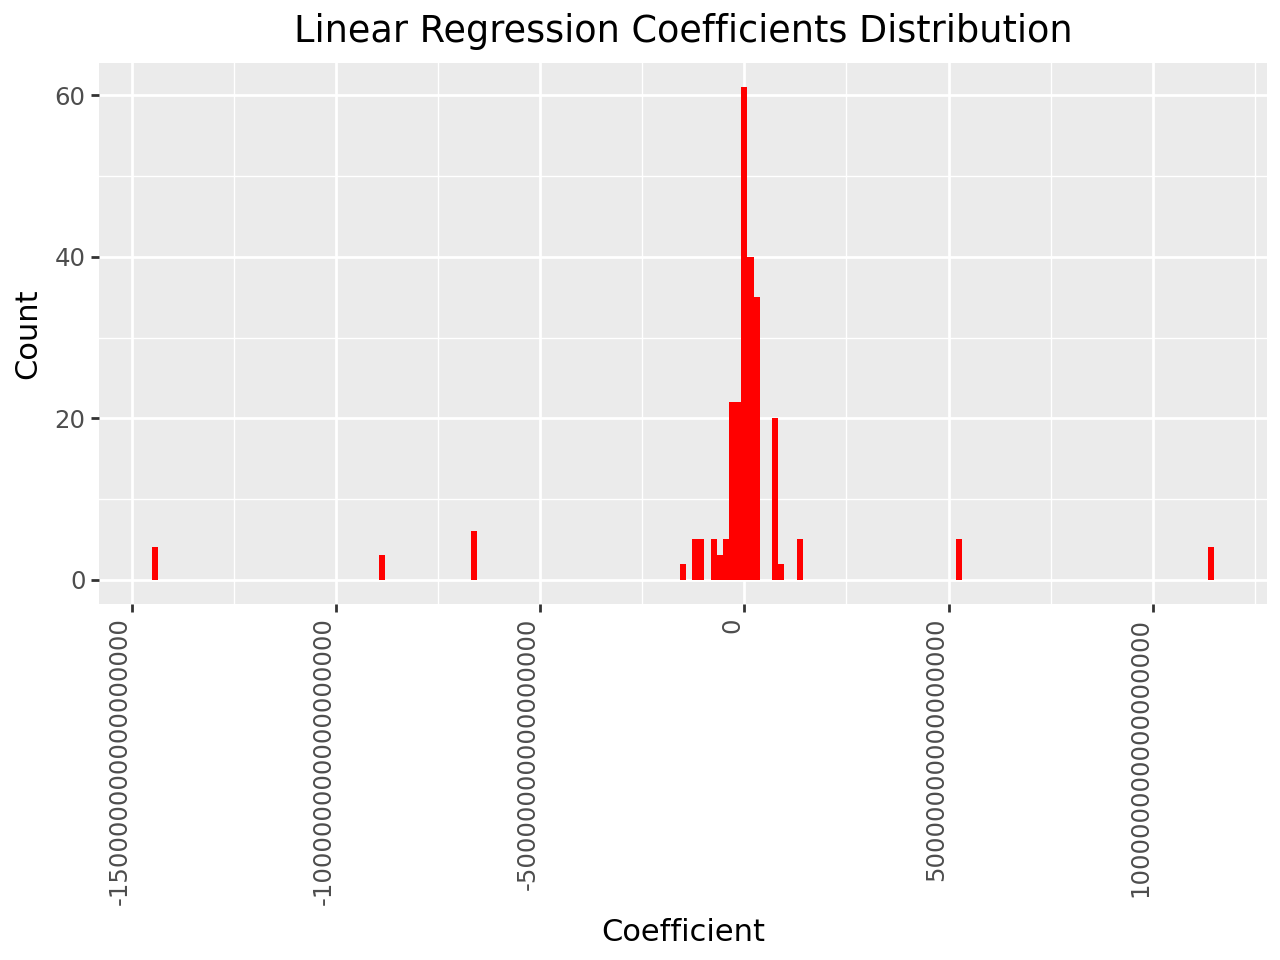

In [156]:
plot_df = pd.merge(coefficients_df1, coefficients_df2, left_on= "Feature", right_on= "Feature")

(ggplot(plot_df, aes(x = "Coefficient Lin"))+
    geom_histogram(fill = "red")+
    theme(axis_text_x = element_text(rotation = 90, hjust = 1))+
    labs(title = "Linear Regression Coefficients Distribution",
         x = "Coefficient",
         y = "Count"))

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 109'. Pick better value with 'binwidth'.


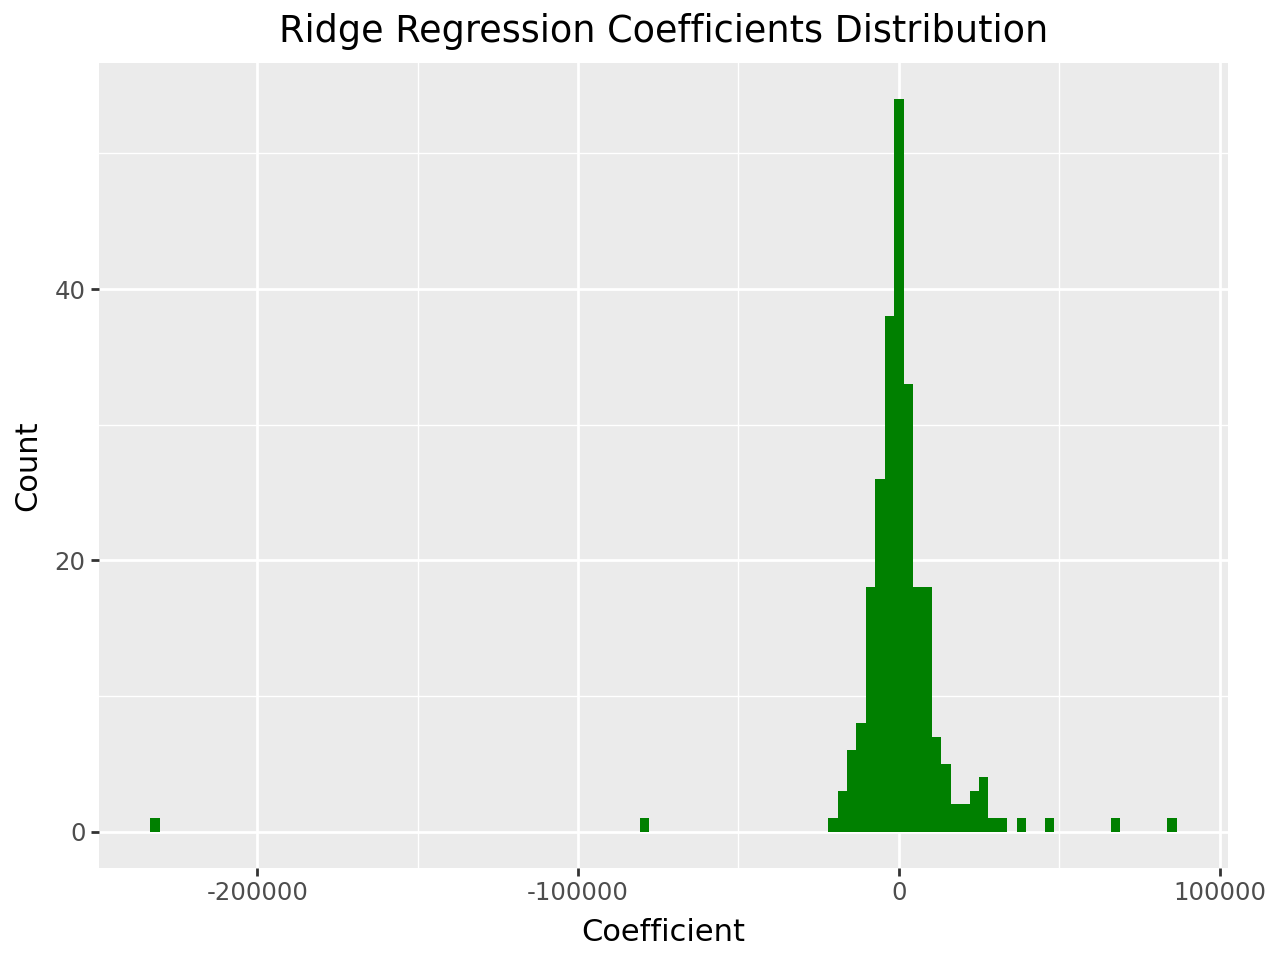

In [157]:
(ggplot(plot_df, aes(x = "Coefficient Rid"))+
    geom_histogram(fill = "green")+
    labs(title = "Ridge Regression Coefficients Distribution",
         x = "Coefficient",
         y = "Count"))

# Tuning Lambda

In [158]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

lambdas = {"ridge_regression__alpha": [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(ridge_pipeline, lambdas, cv = 5, scoring= "r2")

gscv_fitted = gscv.fit(X, y)

In [159]:
mean_test_scores = gscv_fitted.cv_results_['mean_test_score']

results_df = pd.DataFrame({
    "Lambda": lambdas["ridge_regression__alpha"],
    "scores": mean_test_scores
})

results_df.sort_values(by = "scores", ascending = False).head()

,Lambda,scores
4,10.000,0.864
3,1.000,0.862
2,0.100,0.856
1,0.010,0.854
0,0.001,0.854


# Lasso Regression

In [189]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
)

lambdas = {"lasso_regression__alpha": [0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(lasso_pipeline, lambdas, cv = 5, scoring= "r2")
gscv_fitted = gscv.fit(X, y)

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.756e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.553e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.338e+10, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.914e+10, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.786e+10, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.743e+10, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+11, tolerance: 1.477e+09


In [191]:
mean_test_scores = gscv_fitted.cv_results_['mean_test_score']

results_df = pd.DataFrame({
    "Lambda": lambdas["lasso_regression__alpha"],
    "scores": mean_test_scores
})

results_df.sort_values(by = "scores", ascending = False).head()

,Lambda,scores
4,10.000,0.861
3,1.000,0.857
2,0.100,0.857
1,0.010,0.856
0,0.001,0.856


In [192]:
best_lasso_pipeline = gscv.best_estimator_

lasso_coefficients = best_lasso_pipeline.named_steps['lasso_regression'].coef_
coefficients_df3 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient Las': lasso_coefficients
})

coefficients_df3.sort_values(by='Coefficient Las', ascending=False).reset_index(drop=True).head()

,Feature,Coefficient Las
0,dummify__Neighborhood_GrnHill,109304.458
1,dummify__Roof Matl_WdShngl,62703.103
2,dummify__Condition 2_PosA,52128.522
3,dummify__Neighborhood_StoneBr,44606.403
4,dummify__Exterior 1st_PreCast,43928.948


Similar to the Ridge model, the Lasso model saw best R-squared values for higher lambda values.

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 229 rows containing missing values.


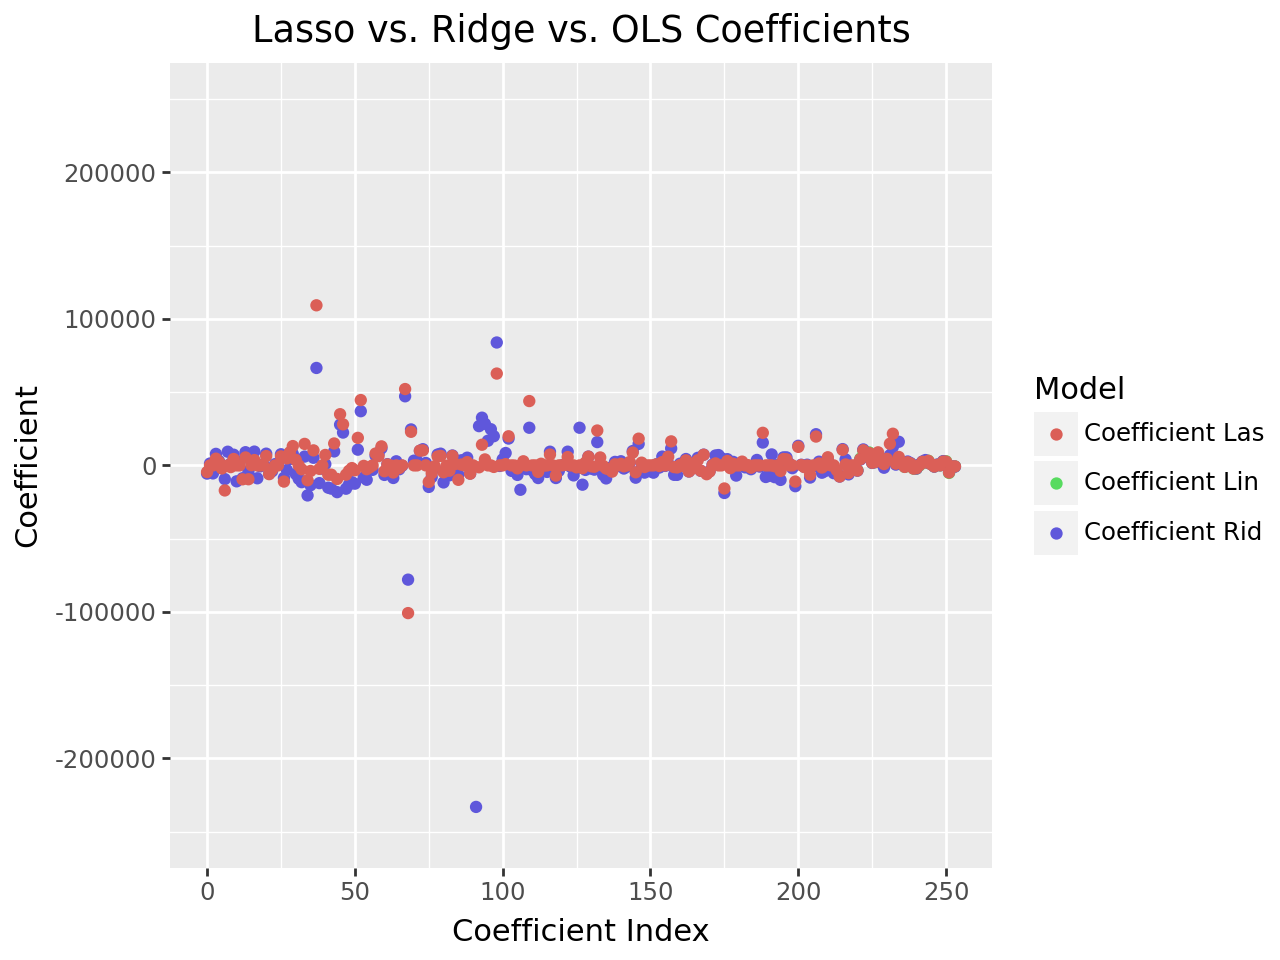

In [193]:
plot_df2 = pd.merge(plot_df, coefficients_df3, left_on = "Feature", right_on = "Feature")
plot_df2 =  plot_df2.reset_index()

plot_df2 = pd.melt(plot_df2, id_vars = ["index", "Feature"], value_vars= ["Coefficient Lin", "Coefficient Rid", "Coefficient Las"], var_name = "Model", value_name = "Coefficient")

from plotnine import scale_y_continuous

(ggplot(plot_df2, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient")+
    scale_y_continuous(limits = (-250000, 250000)))

When comparing Lasso coefficients to Ridge coefficients, the two models produce coefficients of similar magnitude. However, the Lasso model produced more coefficients closer to or equal to 0 than the Ridge model.

In [194]:
plot_df2[plot_df2["Coefficient"] == 0]["Model"].value_counts()

Model
Coefficient Las    61
Name: count, dtype: int64

61 coefficients had a value of 0. All 24 of these instances came from the Lasso model.

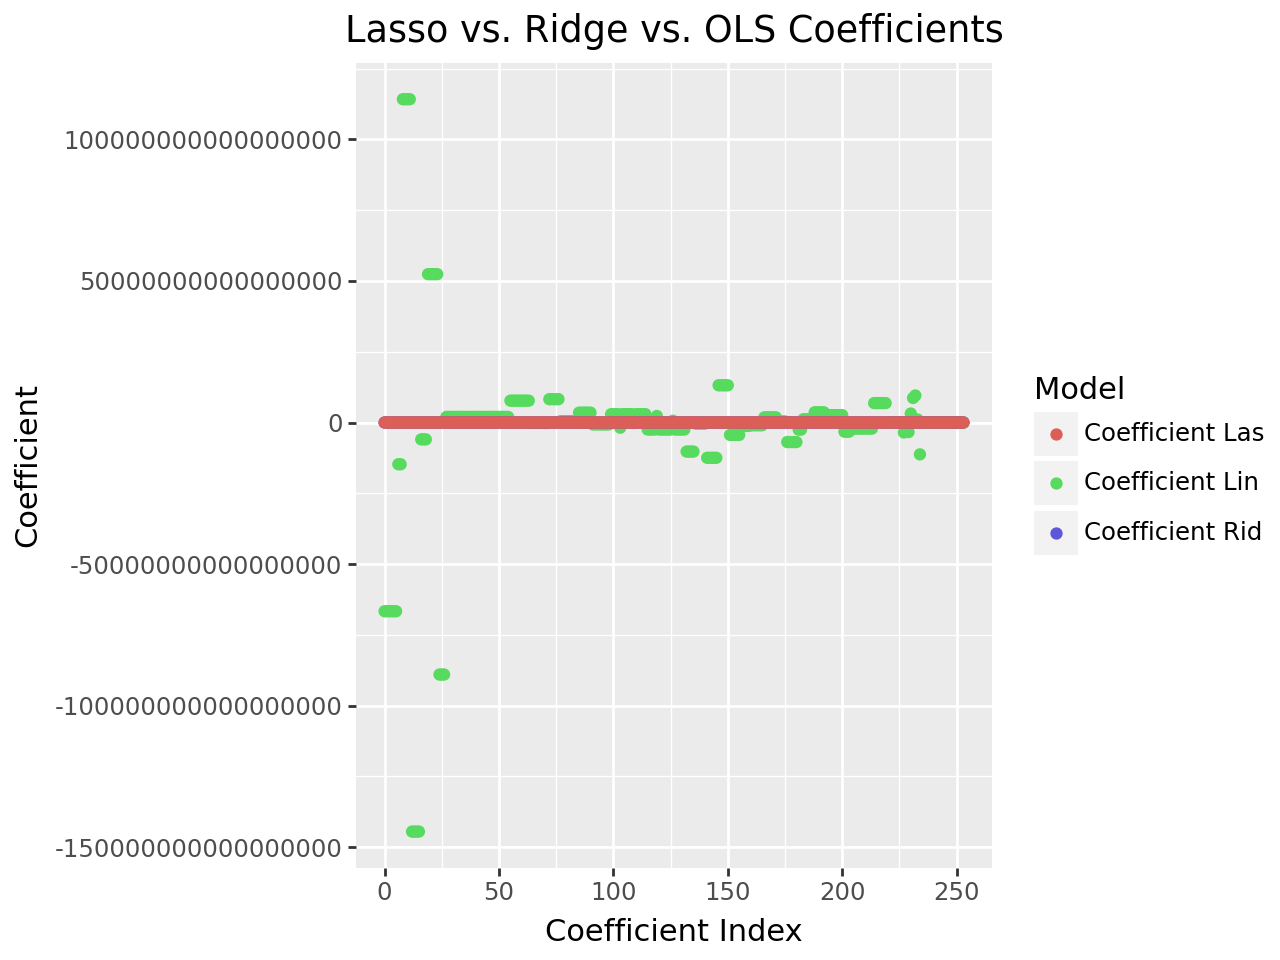

In [196]:
(ggplot(plot_df2, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient"))

When we zoom out, we can see that the OLS regression model's coefficient are significantly larger than both the Lasso and Ridge models. This is encouraging, showing that the additional term in the loss function helps reduce overfitting.

# Elastic Net

In [197]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)

lambdas = {"elastic_regression__alpha": [0.001, 0.01, 0.1, 1, 10],
           "elastic_regression__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}


gscv = GridSearchCV(elastic_pipeline, lambdas, cv = 5, scoring= "r2")

gscv_fitted = gscv.fit(X, y)

C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.466e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.259e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.122e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.353e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.237e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.347e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.137e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.068e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.249e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.119e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.975e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.005e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.109e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.963e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.963e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.737e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.928e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.897e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.734e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.564e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.319e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.826e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.325e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+09, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+10, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.603e+09, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.311e+09, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.277e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.999e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.789e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.184e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.943e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.470e+11, tolerance: 1.348e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.258e+11, tolerance: 1.474e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.103e+11, tolerance: 1.463e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.356e+11, tolerance: 1.407e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.233e+11, tolerance: 1.477e+09


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.064e+09, tolerance: 1.793e+09


In [199]:
best_elastic_pipeline = gscv.best_estimator_

elastic_coefficients = best_elastic_pipeline.named_steps['elastic_regression'].coef_
coefficients_df4 = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient Ela': elastic_coefficients
})

coefficients_df4.sort_values(by='Coefficient Ela', ascending=False).reset_index(drop=True).head()

,Feature,Coefficient Ela
0,dummify__Neighborhood_StoneBr,28263.749
1,dummify__Neighborhood_NoRidge,26056.519
2,dummify__Roof Matl_WdShngl,22702.262
3,dummify__Neighborhood_NridgHt,20949.949
4,dummify__Kitchen Qual_Ex,16656.298


In [229]:
cv_results = gscv_fitted.cv_results_

results_df = pd.DataFrame(cv_results)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score"]]
results_df = results_df.sort_values(by="mean_test_score", ascending=False).reset_index(drop = True)

results_df.head()

,param_elastic_regression__alpha,param_elastic_regression__l1_ratio,mean_test_score
0,0.010,0.500,0.864
1,0.010,0.700,0.864
2,0.010,0.300,0.864
3,0.010,0.100,0.864
4,0.100,0.900,0.864


C:\Users\petew\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 232 rows containing missing values.


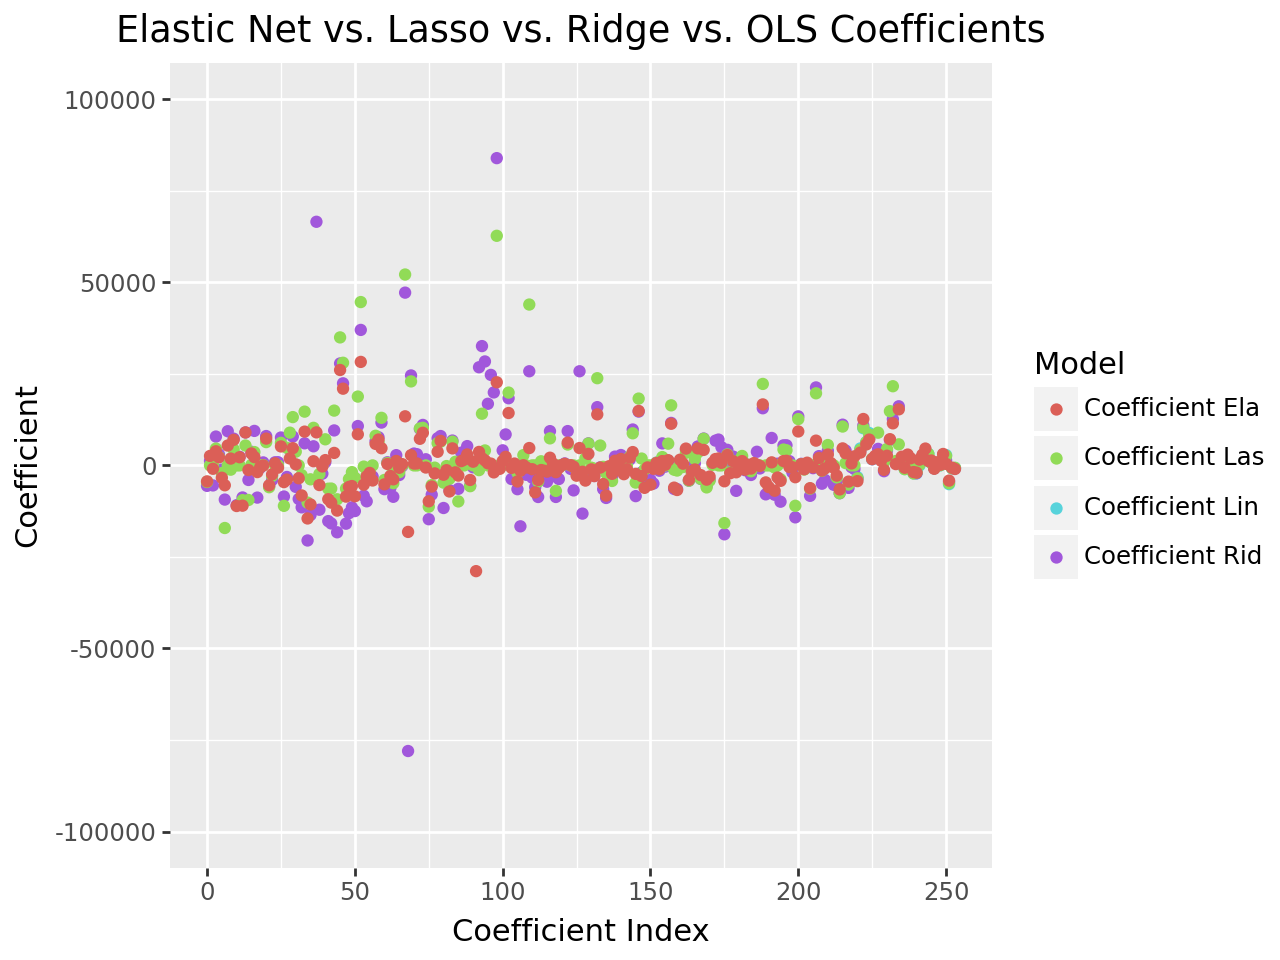

In [207]:
plot_df2 = pd.merge(plot_df, coefficients_df3, left_on = "Feature", right_on = "Feature")
plot_df3 = pd.merge(plot_df2, coefficients_df4, left_on = "Feature", right_on = "Feature")
plot_df3 =  plot_df3.reset_index()

plot_df3 = pd.melt(plot_df3, id_vars = ["index", "Feature"], value_vars= ["Coefficient Lin", "Coefficient Rid", "Coefficient Las", "Coefficient Ela"], var_name = "Model", value_name = "Coefficient")

from plotnine import scale_y_continuous

(ggplot(plot_df3, aes(x = "index", y = "Coefficient", color = "Model"))+
    geom_point()+
    labs(title = "Elastic Net vs. Lasso vs. Ridge vs. OLS Coefficients",
         x = "Coefficient Index",
         y = "Coefficient")+
    scale_y_continuous(limits = (-100000, 100000)))

In [224]:
(plot_df3.groupby("Model")["Coefficient"].apply(lambda x: x.abs().mean())).sort_values()


Model
Coefficient Ela                3966.209
Coefficient Las                7675.019
Coefficient Rid                8234.512
Coefficient Lin   10652376084582012.000
Name: Coefficient, dtype: float64

The Elastic Net model produced the lowest mean absolute coefficient value out of all 4 models, significantly reducing overfitting.